## 1. 사이킷런, 퍼셉트론 훈련


- 150개의 꽃 샘플에서 꽃잎 길이와 꽃잎 너비를 특성 행렬 X에 할당하고 꽃 품종에 해당하는 클래스 레이블을 벡터 y에 할당
- 정수 레이블 : Iris-setosa(0), Iris-versicolor(1), Iris-virginica(2)

In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

print('클래스 레이블:', np.unique(y))

클래스 레이블: [0 1 2]


#### 훈련 데이터셋, 테스트 데이터셋 분할
- train_test_split 함수가 데이터 분할 전 데이터 셋 미리 섞기 (random_state 설정)
- stratify = y : 계층화 기능 사용(훈련 데이터셋과 테스트 데이터셋의 클래스 레이블 비율을 입력 데이터셋과 동일하게 함)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify = y)

In [5]:
#계층화 테스트
print(f'y의 레이블 카운트: {np.bincount(y)}')
print(f'y_train의 레이블 카운트: {np.bincount(y_train)}')
print(f'y_test의 레이블 카운트: {np.bincount(y_test)}')

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


#### StandardScaler
- StandardScaler의 fit( ) : 훈련 데이터셋의 각 특성 차원마다 샘플평균, 표준편차 계산
- StandardScaler의 transform( ) : 계산된 평균, 표준편차로 훈련 데이터셋 표준화

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)

#trainSet, testSet 표준편차(std)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

- 사이킷런의 OvR(One-versus-Rest) 다중 분류

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
#퍼셉트론 모델 훈련
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

#### 학습률 조정 

    학습률 너무 클 때 : 알고리즘이 전역 최솟값 지나침
    
    학습률 너무 작을 때 : 학습속도가 느려 대규모 데이터셋에서 수렴하기 까지 많은 에포크 필요

In [6]:
# 45개의 샘플에서 1개 잘못 분류 (분류오차 : 0.022)
y_pred = ppn.predict(X_test_std)
print(f'잘못 분류된 샘플 개수: {(y_test != y_pred).sum()}')

잘못 분류된 샘플 개수: 1


In [7]:
from sklearn.metrics import accuracy_score
#pred 예측 정확도
print(f'정확도: {accuracy_score(y_test, y_pred)}')
#test셋 정확도
print(f'정확도: {ppn.score(X_test_std, y_test)}')

정확도: 0.9777777777777777
정확도: 0.9777777777777777


In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y, classifier, test_idx=None, resolution=0.02):
    
    #마커, 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #결정 경계 그리기
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y ==cl, 0], y=X[y ==cl, 1],alpha =0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
    
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        
        plt.scatter(X_test[:,0], X_test[:,1], facecolors='none', edgecolor='black', alpha=1.0, linewidth=1, marker='o', s=100, label='test set')
                           


/var/folders/6q/cy3y3kyx3218xz2ymsd6n8jc0000gn/T/ipykernel_938/4065348622.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y ==cl, 0], y=X[y ==cl, 1],alpha =0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


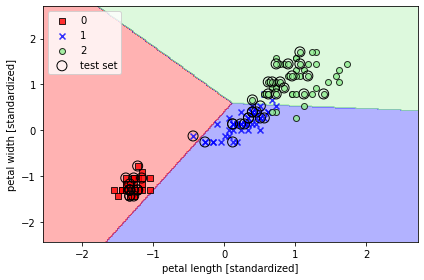

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# 결과 : 세 개의 붓꽃 클래스는 선형 결정 경계로 완벽 분류 불가 

## 2. 로지스틱 회귀를 사용한 클래스 확률 모델링

### 아달린 구현을 로지스틱 회귀 알고리즘으로 변경

In [10]:
class LogisticRegressionGD(object):
    """ 경사 하강법을 사용한 로지스틱 회귀 분류기
    
    매개 변수
    -------
    eta : float, 학습률(0.0 ~ 1.0)
    n_iter : int, 훈련 데이터셋 반복 횟수(epoch)
    random_state : int
    
    속성 
    _______
    w_ : 학습된 가중치
    cost_ : 에포크 마다 누적된 로지스틱 비용함수 값
    
    
    """
    
    def __init__(self, eta=0.5, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y- output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            
            #제곱 오차합 대신 로지스틱 비용 계산
            cost = (-y.dot(np.log(output))- ((1-y).dot(np.log(1-output))))
            self.cost_.append(cost)
            
        return self
    
    def net_input(self,X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        return 1./(1.+ np.exp(-np.clip(z,-250, 250)))
    
    def predict(self, X):
        """단위 계단 함수를 사용해 클래스 레이블 반환"""
        return np.where(self.net_input(X)>=0.0, 1,0)
        

/var/folders/6q/cy3y3kyx3218xz2ymsd6n8jc0000gn/T/ipykernel_1196/4065348622.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y ==cl, 0], y=X[y ==cl, 1],alpha =0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


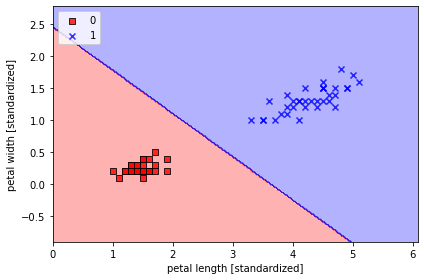

In [14]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state = 1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

###  사이킷런을 사용하여 로지스틱 회귀 모델 훈련

#### - sklearn.linear_model.LogisticRegression의 fit 메서드로 붓꽃데이터셋 클래스 세 개 모델 훈련

/var/folders/6q/cy3y3kyx3218xz2ymsd6n8jc0000gn/T/ipykernel_938/4065348622.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y ==cl, 0], y=X[y ==cl, 1],alpha =0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


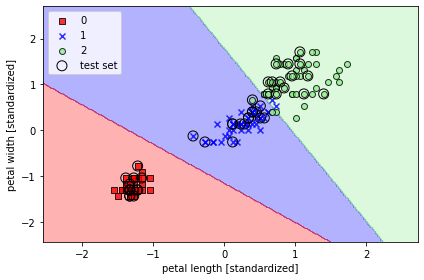

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)

lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))


plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

#### - predict_proba( ) : 훈련 샘플이 어떤 클래스에 속할 확률 구하는 메서드
#### - 행에서 가장 큰 값의 열이 예측 클래스 레이블이 됨

In [12]:
#조건부 확률을 계산하고 넘파이 argmax 함수로 직접 클래스 레이블로 바꿈
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

#### - 사이킷런에서는 입력데이터로 2차원 배열을 입력해야하기 때문에 2차원 포멧으로 변경 필수

In [13]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

### 규제를 사용하여 과대적합 피하기 

#### 사이킷런의 LogisticRegression 클래스의 매개변수 C :  규제 하이퍼파라미터 람다의 역수
    - C의 값을 감소시키면 규제 강도 증가

## 3. 슬랙변수를 사용하여 비선형 분류 문제 다루기

#### 서포트 벡터 머신
    : 마진을 최대화하여 일반화 오차 줄이기 
    * 마진(margin) : 클래스를 구분하는 초평면과 이 초평면에 가장 가까운 훈련 샘플 사이의 거리
    * 서포트 벡터 : 초평면에 가장 가까운 훈련 샘플

#### 소프트 마진 분류(soft margin classification)
    :슬랙 변수를 이용해 선형적으로 구분되지 않는 데이터 분류를 위해 선형 제약 조건을 완화
    -> 적절히 비용을 손해 보면서 오차가 있는 상황에서 최적화

/var/folders/6q/cy3y3kyx3218xz2ymsd6n8jc0000gn/T/ipykernel_938/4065348622.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y ==cl, 0], y=X[y ==cl, 1],alpha =0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


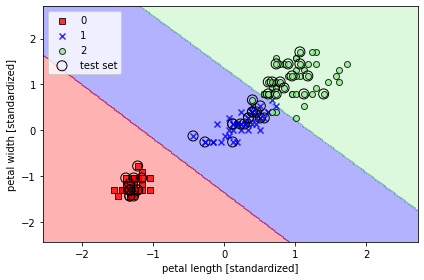

In [14]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

#붓꽃 데이터셋에서 훈련한 SVM 분류기의 결정 영역 세 개 표시

## 4. 커널 SVM을 사용해 비선형 문제 풀기

#### 커널 기법을 사용하여 고차원 공간에서 분할 초평면 찾기
    :매핑함수를 사용하여 훈련 데이터를 고차원 특성 공간으로 변환하고, 
     이 공간에서 선형 SVM 모델을 훈련한 뒤 매핑함수로 새로운 데이터 변환 뒤 SVM 모델 사용하여 분류

#### - 방사 기저함수(Radical Basis Function, RBF)/ 가우시안 커널을 커널함수로 사용해 두 포인터 사이 점곱을 계산하는 비용 절감

#### - 커널(kernel) : 샘플 간의 유사도 함수, 음수 부호가 거리 측정을 유사도 점수로 바꾸는 역할

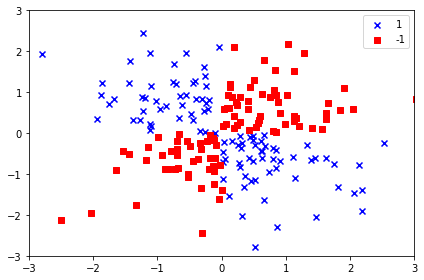

In [17]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)

y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor ==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1], c='r', marker='s', label='-1')

plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### SVM을 훈련하여 XOR 데이터를 구분하는 비선형 결정경계를 그릴 수 있는지 확인

/var/folders/6q/cy3y3kyx3218xz2ymsd6n8jc0000gn/T/ipykernel_938/4065348622.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y ==cl, 0], y=X[y ==cl, 1],alpha =0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


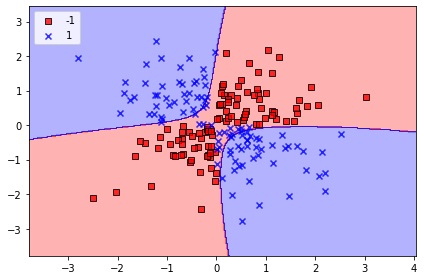

In [20]:
#gamma=0.1 : 가우시안 구의 크기를 제한하는 매개변수 (gamma 값이 크면 서포트 벡터 영향, 범위가 줄어듬)

svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/6q/cy3y3kyx3218xz2ymsd6n8jc0000gn/T/ipykernel_938/4065348622.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y ==cl, 0], y=X[y ==cl, 1],alpha =0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


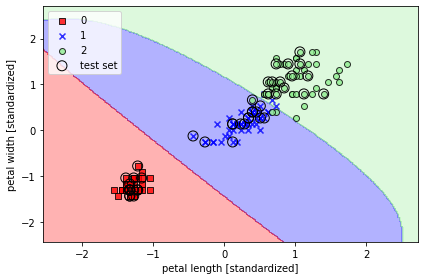

In [23]:
#붓꽃 데이터셋에서 RBF 커널 SVM 적용하기 
#gamma값을 작게하여 부드럽게 결정경계 그리기
svm = SVC(kernel='rbf', random_state= 1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

/var/folders/6q/cy3y3kyx3218xz2ymsd6n8jc0000gn/T/ipykernel_938/4065348622.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y ==cl, 0], y=X[y ==cl, 1],alpha =0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


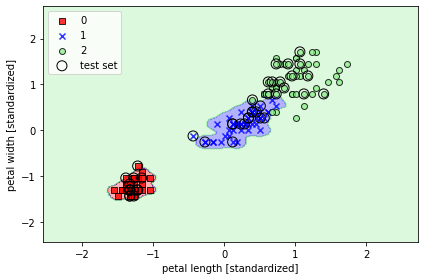

In [24]:
#gamma값을 크게하여 클래스 0 와 클래스 1 주위로 결정 경계 매우 가깝게 나타나게 하기
svm = SVC(kernel='rbf', random_state= 1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## 5. 결정 트리 학습

#### 결정 트리 만들기 

/var/folders/6q/cy3y3kyx3218xz2ymsd6n8jc0000gn/T/ipykernel_938/4065348622.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y ==cl, 0], y=X[y ==cl, 1],alpha =0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')


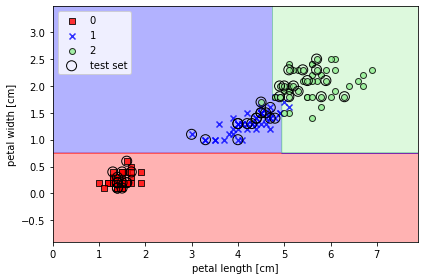

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()